# Analyzing Heart Attack Risk Factors Dataset

Dataset taken from Kaggle
[❤️Heart Attack Risk Factors Dataset](https://www.kaggle.com/datasets/waqi786/heart-attack-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/heart_attack_dataset.csv')
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [13]:
# Check what kind of values there are in the categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(column)
    print(df[column].unique())

Gender
['Male' 'Female']
Has Diabetes
['No' 'Yes']
Smoking Status
['Never' 'Current' 'Former']
Chest Pain Type
['Typical Angina' 'Atypical Angina' 'Non-anginal Pain' 'Asymptomatic']
Treatment
['Lifestyle Changes' 'Angioplasty' 'Coronary Artery Bypass Graft (CABG)'
 'Medication']


Text(0.5, 1.0, 'Gender Distribution of Dataset')

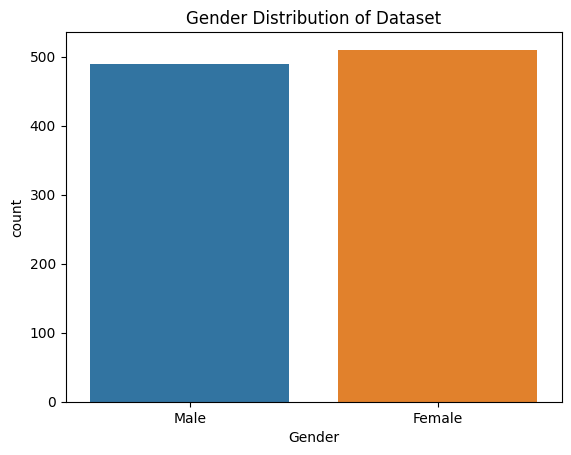

In [43]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution of Dataset')

In [19]:
no_symptoms = df[df['Chest Pain Type'] =='Asymptomatic']
with_symptoms = df[df['Chest Pain Type'] !='Asymptomatic']
print(no_symptoms.shape)
print(with_symptoms.shape)

(255, 8)
(745, 8)


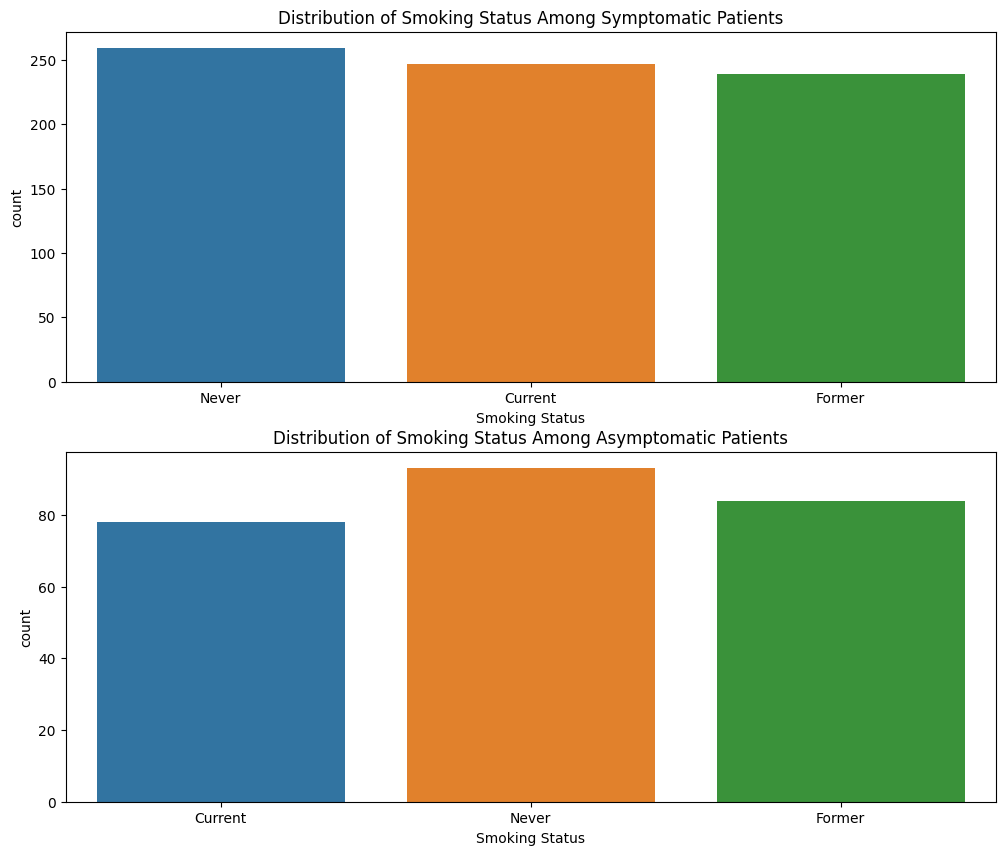

In [44]:
fig, ax = plt.subplots(2, figsize=(12,10))
sns.countplot(data=with_symptoms, x='Smoking Status', ax=ax[0])
ax[0].title.set_text('Distribution of Smoking Status Among Symptomatic Patients')
sns.countplot(data=no_symptoms, x='Smoking Status', ax=ax[1])
ax[1].title.set_text('Distribution of Smoking Status Among Asymptomatic Patients')

Text(0.5, 1.0, 'Age Distribution of Dataset')

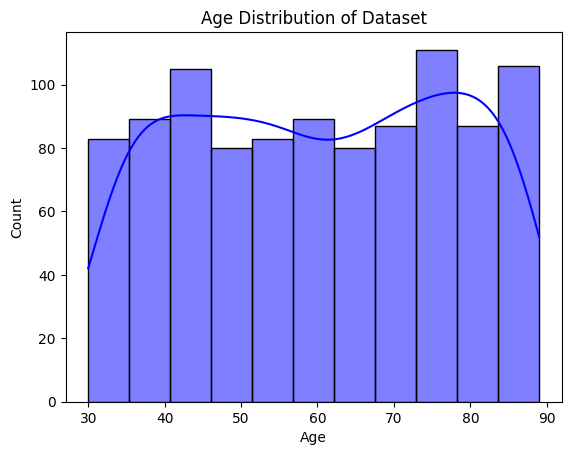

In [45]:
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution of Dataset')

Text(0.5, 1.0, 'Age Distribition of Patients with Symptoms')

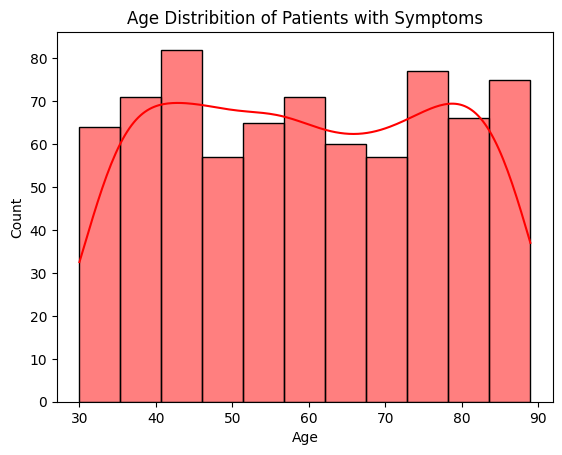

In [46]:
sns.histplot(with_symptoms['Age'], kde=True, color='red')
plt.title('Age Distribition of Patients with Symptoms')

Text(0.5, 1.0, 'Age Distribition of Patients with No Symptoms')

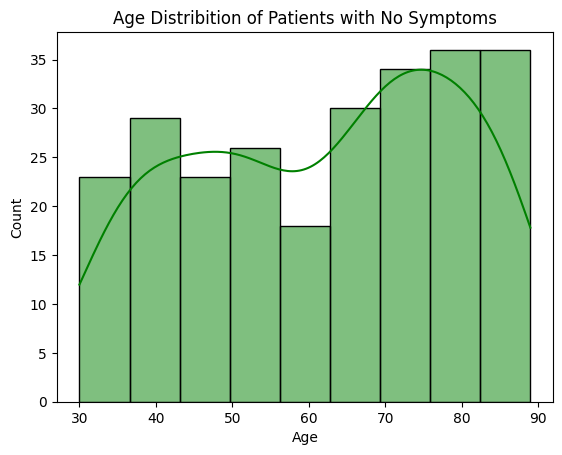

In [47]:
sns.histplot(no_symptoms['Age'], kde=True, color='green')
plt.title('Age Distribition of Patients with No Symptoms')

<Axes: xlabel='Blood Pressure (mmHg)', ylabel='Cholesterol (mg/dL)'>

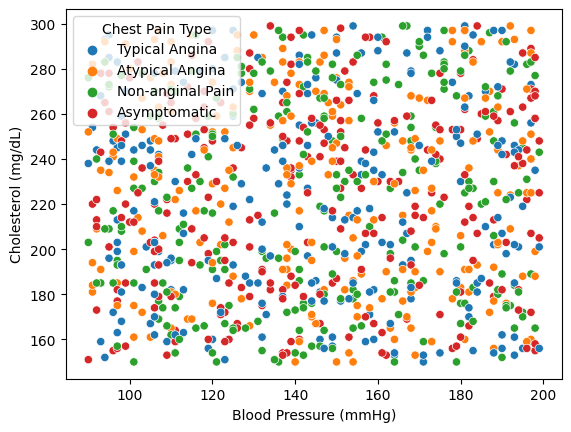

In [26]:
sns.scatterplot(data=df, x='Blood Pressure (mmHg)', y='Cholesterol (mg/dL)', hue='Chest Pain Type')

Text(0.5, 1.0, 'Distribution of Blood Pressure')

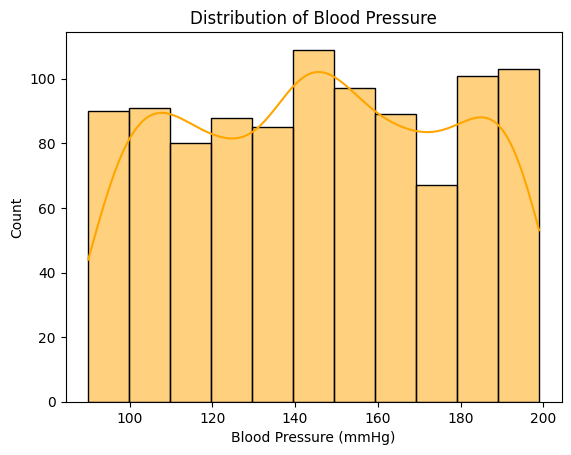

In [49]:
sns.histplot(df['Blood Pressure (mmHg)'], kde=True, color='orange')
plt.title('Distribution of Blood Pressure')

Text(0.5, 1.0, 'Distribution of Choloesterol')

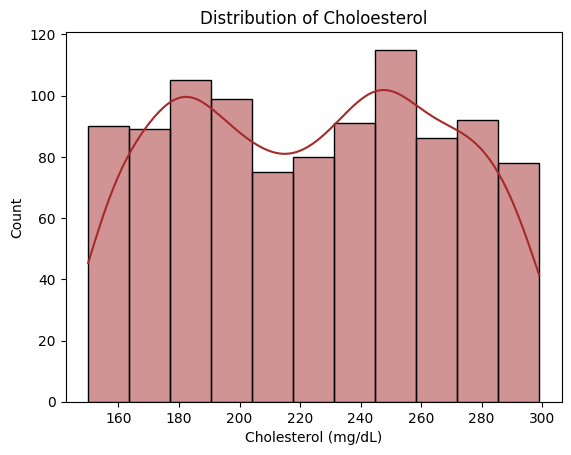

In [53]:
sns.histplot(df['Cholesterol (mg/dL)'], kde=True, color='brown')
plt.title('Distribution of Choloesterol')

In [27]:
df['has_symptoms'] = df['Chest Pain Type'].apply(lambda x: 0 if x=='Asymptomatic' else 1)

In [66]:
df.drop(columns=['Chest Pain Type'], inplace=True)

In [67]:
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Treatment,has_symptoms
0,Male,70,181,262,No,Never,Lifestyle Changes,1
1,Female,55,103,253,Yes,Never,Angioplasty,1
2,Male,42,95,295,Yes,Current,Angioplasty,1
3,Male,84,106,270,No,Never,Coronary Artery Bypass Graft (CABG),1
4,Male,86,187,296,Yes,Current,Medication,1


Text(0.5, 1.0, 'Boxplot of Cholesterol')

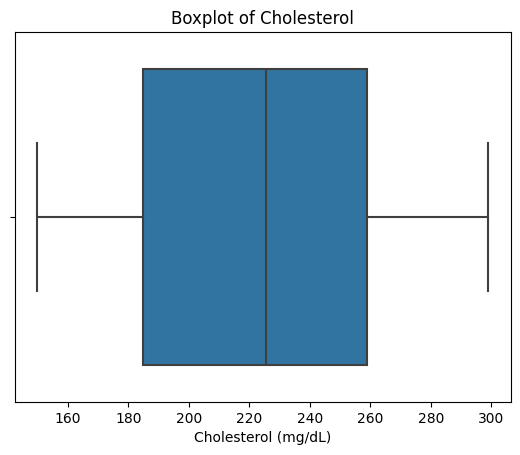

In [59]:
sns.boxplot(data=df, x='Cholesterol (mg/dL)')
plt.title('Boxplot of Cholesterol')

Text(0.5, 1.0, 'Boxplot of Blood Pressure')

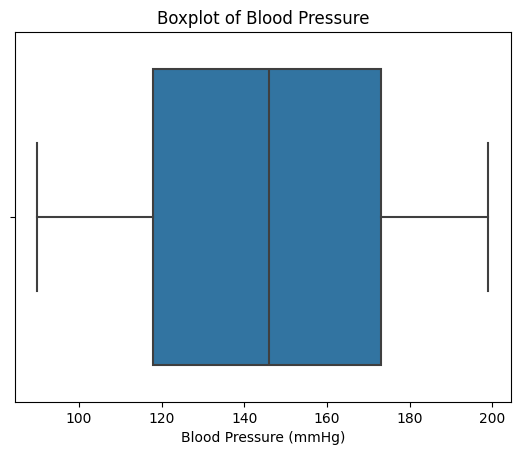

In [58]:
sns.boxplot(data=df, x='Blood Pressure (mmHg)')
plt.title('Boxplot of Blood Pressure')

# Modeling
Let's build a machine learning model to predict whether a given patient will have symptoms

Tasks:
1. Scale the Numerical Columns
2. Transform the categorical columns into numerical features
3. Split data into train and test splits
4. Compare model metrics

In [69]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score

In [65]:
column_transformer = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
     (OneHotEncoder(), make_column_selector(dtype_include='object'))
)
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x312062ad0>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x312063c40>)])

In [68]:
X = df.drop(columns=['has_symptoms'])
y = df['has_symptoms']
print(X.shape)
print(y.shape)

(1000, 7)
(1000,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 7) (200, 7) (800,) (200,)


/Users/ryantenbarge/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Training Data Class Distribution')

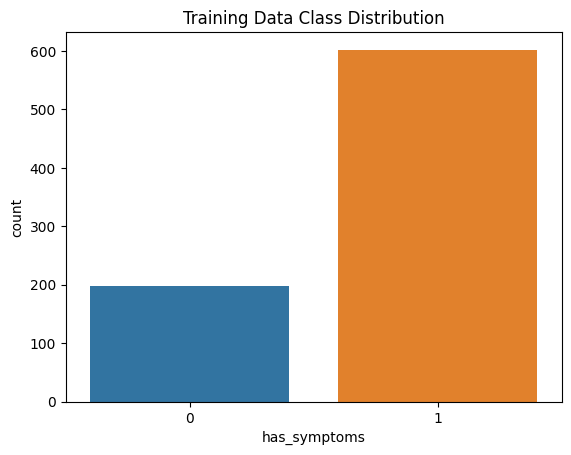

In [86]:
sns.countplot(y_train)
plt.title('Training Data Class Distribution')

/Users/ryantenbarge/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Testing Data Class Distribution')

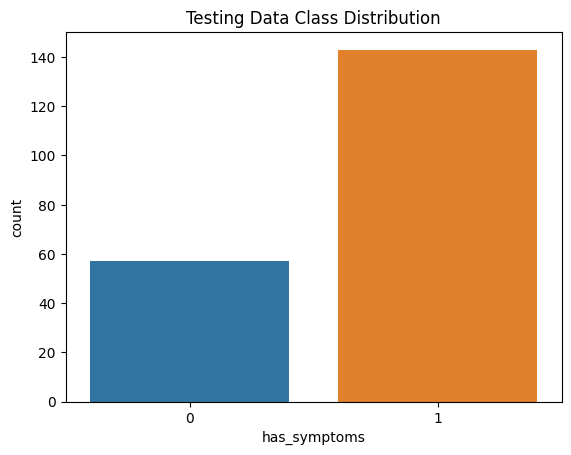

In [87]:
sns.countplot(y_test)
plt.title('Testing Data Class Distribution')

In [93]:
positive_y_train_percent = (y_train[y_train==1].sum())/len(y_train)
positive_y_test_percent = (y_test[y_test==1].sum())/len(y_test)
print(f'Train data is {round(positive_y_train_percent*100, 2)}% positives. Test data is {round(positive_y_test_percent*100, 2)}% positives')

Train data is 75.25% positives. Test data is 71.5% positives


It looks like the data is not very well distributed. Models may just end up predicting the most common class (1) for each data sample...

In [71]:
X_train_transformed = column_transformer.fit_transform(X_train)
X_train_transformed.shape

(800, 14)

In [72]:
X_test_transformed = column_transformer.transform(X_test)
X_test_transformed.shape

(200, 14)

**Since we are predicting whether a patient will have chest pain symtoms or not, I would like to use recall
as the scoring metric. In my opinion, it is important to catch all potential cases of chest pain, even if
it means identifying a few false positives.**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score

In [76]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          KNeighborsClassifier()]

In [77]:
for model in models:
    scores = cross_val_score(model,
        X_train_transformed, y_train, cv=5, scoring='recall')
    print(f'{model} has a recall score of {scores.mean()}')

LogisticRegression() has a recall score of 1.0
RandomForestClassifier() has a recall score of 0.9385399449035813
KNeighborsClassifier() has a recall score of 0.8986225895316803


It looks like a Logistic Regression was able to recall 100% of patients with symptoms during cross validation.
Let's evaluate on the test dataset next.

In [79]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)

LogisticRegression()

In [80]:
results = model.predict(X_test_transformed)
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [88]:
rs = recall_score(y_pred=results, y_true=y_test)
acc = accuracy_score(y_pred=results, y_true=y_test)
print(f'Recall: {rs} \n Accuracy: {acc}')

Recall: 1.0 
 Accuracy: 0.715


It seems that the model is just randomly guessing 1 for each sample. This ensures 100% recall and an accuracy
which nearly perfectly matches the distribution of the dataset. This model is likely not going to be very useful
for predicting chest pain in patients.